# Q-Networks for Hexagon Chess

## Setup

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
from engines.environment import HexChessEnv
from engines.qnetworks import QNetworkAgent, QLearning
from hexchess.players import RandomPlayer

pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


2024-02-25 18:16:01.636944: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-25 18:16:01.678149: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-25 18:16:01.678192: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-25 18:16:01.678225: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-25 18:16:01.685658: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-25 18:16:01.687029: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

## The environment

In [4]:
# Teach Q networks to play against a random agent playing white
opponent_class = RandomPlayer
opponent_is_white = True
env = HexChessEnv(opponent_class, opponent_is_white)

In [5]:
env.render()

     B K N R P * 
    Q B * * P * * 
   N * B * P * * * 
  R * * * P * * * * 
 P P P P P * * * * * 
* * * * * * * * * * * 
 * * * * * P P P P P 
  * * * * P * * * R 
   * * * P * B * N 
    * * P * * B K 
     * P R N Q B 


## The Agent

In [6]:
agent = QNetworkAgent(discount_factor=0.1, learning_rate=1e-2)

In [7]:
agent.fix_model()
agent.model_fixed.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 11, 11, 6)         330       
                                                                 
 up_sampling2d (UpSampling2  (None, 33, 33, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 33, 33, 3)         165       
                                                                 
 up_sampling2d_1 (UpSamplin  (None, 99, 99, 3)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 95, 95, 1)         76        
                                                                 
 conv2d_3 (Conv2D)           (None, 91, 91, 1)         2

## Learn

In [8]:
q_learning = QLearning(agent, env, memory_size=100)

In [21]:
n_episodes = 750
model_fix_episodes = 10
max_episode_length = 250
batch_size = 25

rewards = q_learning.learn(
    n_episodes=n_episodes,
    model_fix_episodes=model_fix_episodes,
    max_episode_length=max_episode_length,
    batch_size=batch_size,
)

Episode 0: -42
Episode 1: -49
Episode 2: 45
Episode 3: -49
Episode 4: -42
Episode 5: -43
Episode 6: -51
Episode 7: 45
Episode 8: 38
Episode 9: -47
Episode 10: -42
Episode 11: 49
Episode 12: 36
Episode 13: -37
Episode 14: 38
Episode 15: 37
Episode 16: -64
Episode 17: 37
Episode 18: 44
Episode 19: -49
Episode 20: 53
Episode 21: 44
Episode 22: -42
Episode 23: -53
Episode 24: 40
Episode 25: -41
Episode 26: -28
Episode 27: -50
Episode 28: 51
Episode 29: 49
Episode 30: 37
Episode 31: 36
Episode 32: -36
Episode 33: 39
Episode 34: 48
Episode 35: -56
Episode 36: 46
Episode 37: 52
Episode 38: -40
Episode 39: 42
Episode 40: 44
Episode 41: 60
Episode 42: -51
Episode 43: 54
Episode 44: -51
Episode 45: 63
Episode 46: -37
Episode 47: 24
Episode 48: -35
Episode 49: -46
Episode 50: -59
Episode 51: 51
Episode 52: 44
Episode 53: -50
Episode 54: -52
Episode 55: -42
Episode 56: 40
Episode 57: 43
Episode 58: -30
Episode 59: 30
Episode 60: -47
Episode 61: 36
Episode 62: -68
Episode 63: -40
Episode 64: 56
Epi

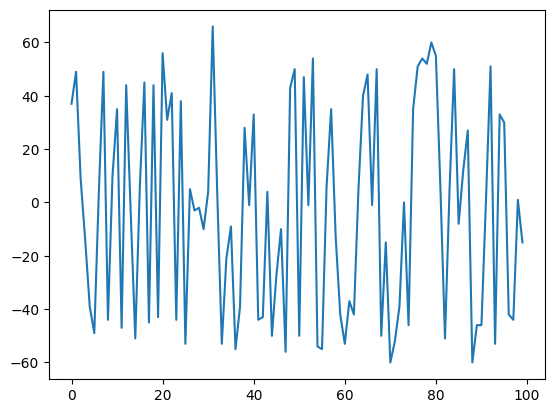

In [ ]:
plt.plot(rewards)

In [ ]:
# Smooth rewards by averaging over the last 25 episodes
kernel_size = 25
kernel = np.ones(kernel_size) / kernel_size
rewards_smooth = np.convolve(rewards, kernel, mode="same")

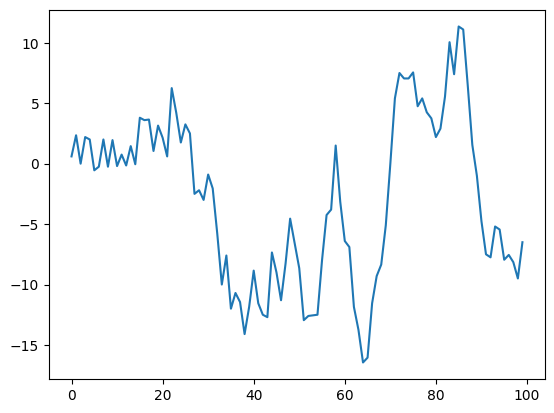

In [ ]:
plt.plot(rewards_smooth)